In [2]:
import pandas as pd

### Reading the data
- First let's read all the available data using the pandas library

In [4]:
order_report = pd.read_csv('Order Report.csv')
sku_master = pd.read_csv('SKU Master.csv')
pincode_mapping = pd.read_csv('pincodes.csv')
courier_invoice = pd.read_csv('Invoice.csv')
courier_company_rates = pd.read_csv('Courier Company - Rates.csv')

print('Order Report:')
print(order_report.head())
print('\nSKU Master:')
print(sku_master.head())
print('\nPincode Mapping:')
print(pincode_mapping.head())
print('\nCourier Invoice:')
print(courier_invoice.head())
print('Courier Company rates:')
print(courier_company_rates.head())

Order Report:
   ExternOrderNo            SKU  Order Qty  Unnamed: 3  Unnamed: 4
0     2001827036  8904223818706        1.0         NaN         NaN
1     2001827036  8904223819093        1.0         NaN         NaN
2     2001827036  8904223819109        1.0         NaN         NaN
3     2001827036  8904223818430        1.0         NaN         NaN
4     2001827036  8904223819277        1.0         NaN         NaN

SKU Master:
             SKU  Weight (g)  Unnamed: 2  Unnamed: 3  Unnamed: 4
0  8904223815682         210         NaN         NaN         NaN
1  8904223815859         165         NaN         NaN         NaN
2  8904223815866         113         NaN         NaN         NaN
3  8904223815873          65         NaN         NaN         NaN
4  8904223816214         120         NaN         NaN         NaN

Pincode Mapping:
   Warehouse Pincode  Customer Pincode Zone  Unnamed: 3  Unnamed: 4
0             121003            507101    d         NaN         NaN
1             121003       

### Missing Values
- let's check if any of the data have missing values

In [12]:
print("\nMissing values in Website Order Report:")
print(order_report.isnull().sum())
print("\nMissing values in SKU Master:")
print(sku_master.isnull().sum())
print('\nMissing values in Pincode Mapping:')
print(pincode_mapping.isnull().sum())
print('\nMissing values in Courier invoice:')
print(courier_invoice.isnull().sum())
print('\nMissing values in courier company rate:')
print(courier_company_rates.isnull().sum())


Missing values in Website Order Report:
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64

Missing values in SKU Master:
SKU            0
Weight (g)     0
Unnamed: 2    66
Unnamed: 3    66
Unnamed: 4    66
dtype: int64

Missing values in Pincode Mapping:
Warehouse Pincode      0
Customer Pincode       0
Zone                   0
Unnamed: 3           124
Unnamed: 4           124
dtype: int64

Missing values in Courier invoice:
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

Missing values in courier company rate:
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed         

### Cleaning the Data
- based on the observations we got above we can now clean teh data
- As you can see the 'Website Order Report', 'SKU Master' and 'Pincode Mapping' dataframes have unnamed columns and we can drop those columns as they are not useful for the analysis

In [13]:
# remove unnamed column from website Order Report dataframe
order_report = order_report.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# remove unnamed columns from SKU Master dataframe
sku_master = sku_master.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

#remove unnamed columns from Pincode mapping dataframe
pincode_mapping = pincode_mapping.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

### Merging Dataframes
- Let's merger the Order Reporrt and SKU Master dataframes on the common column which is "SKU" column 

In [16]:
merged_data = pd.merge(order_report, sku_master, on='SKU')
print(merged_data.head())

   ExternOrderNo            SKU  Order Qty  Weight (g)
0     2001827036  8904223818706        1.0         127
1     2001827036  8904223819093        1.0         150
2     2001827036  8904223819109        1.0         100
3     2001827036  8904223818430        1.0         165
4     2001827036  8904223819277        1.0         350


- As the 'ExternOrderNo' is the same as 'Order Id' in other datasets we can rename it

In [17]:
merged_data = merged_data.rename(columns={'ExternOrderNo': 'Order ID'})
merged_data.head()

,Order ID,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001827036,8904223819093,1.0,150
2,2001827036,8904223819109,1.0,100
3,2001827036,8904223818430,1.0,165
4,2001827036,8904223819277,1.0,350


- Now let's merge the 'courier invoice' and 'pincode maping' dataset

In [18]:
# let's first check the columns of both courier invoice and pincode mapping dataset

print(courier_invoice.columns)
print(pincode_mapping.columns)

Index(['AWB Code', 'Order ID', 'Charged Weight', 'Warehouse Pincode',
       'Customer Pincode', 'Zone', 'Type of Shipment', 'Billing Amount (Rs.)'],
      dtype='object')
Index(['Warehouse Pincode', 'Customer Pincode', 'Zone'], dtype='object')


In [20]:
abc_courier = pincode_mapping.drop_duplicates(subset=['Customer Pincode'])
courier_abc = courier_invoice[['Order ID', 'Customer Pincode', 'Type of Shipment']]
pincodes = courier_abc.merge(abc_courier, on='Customer Pincode')
print(pincodes.head())

     Order ID  Customer Pincode Type of Shipment  Warehouse Pincode Zone
0  2001806232            507101  Forward charges             121003    d
1  2001806273            486886  Forward charges             121003    d
2  2001806408            532484  Forward charges             121003    d
3  2001806458            143001  Forward charges             121003    b
4  2001807012            515591  Forward charges             121003    d


- Now let's merge the pin codes with the main dataframe

In [21]:
merged2 = merged_data.merge(pincodes, on='Order ID')
merged2.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e


- Let's calculate the weight in kilograms by dividing the 'weight(g)' column in the 'merged2' dataframe by 1000

In [22]:
merged2['Weight (Kgs)'] = merged2['Weight (g)'] / 1000
merged2.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone,Weight (Kgs)
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350


- Now let's calculate the weight slabs:

1. The function first calculates the remainder of the weight divided by 1 and rounds it to one decimal place. If the remainder is 0.0, it means the weight is a multiple of 1 KG, and the function returns the weight as it is.
2. If the remainder is greater than 0.5, it means that the weight exceeds the next half KG slab. In this case, the function rounds the weight to the nearest integer and adds 1.0 to it, which represents the next heavier slab.
3. If the remainder is less than or equal to 0.5, it means the weight falls into the current half-KG bracket. In this case, the function rounds the weight to the nearest integer and adds 0.5 to it, which represents the current weight slab.

In [24]:
def weight_slab(weight):
  i = round(weight % 1, 1)
  if i == 0.0:
    return weight
  elif i > 0.5:
    return int(weight) + 1.0
  else:
    return int(weight) + 0.5

merged2['Weight Slab(Kg)'] = merged2['Weight (Kgs)'].apply(weight_slab)
courier_invoice['Weight Slab Charged by Courier Company'] = courier_invoice['Charged Weight'].apply(weight_slab)

- Let's check the data

In [29]:
courier_invoice.head(2)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Weight Slab Charged by Courier Company
0,1091117222124,2001806232,1.3,121003,507101,d,Forward charges,135.0,1.5
1,1091117222194,2001806273,1.0,121003,486886,d,Forward charges,90.2,1.0


In [30]:
merged2.head(2)

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone,Weight (Kgs),Weight Slab(Kg)
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127,0.5
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150,0.5


- Now let’s rename the columns to prepare the desired dataframe

In [31]:
courier_invoice = courier_invoice.rename(columns={'Zone': 'Delivery Zone Charged by Courier Copany'})
merged2 = merged2.rename(columns={'Zone': 'Delivery Zone As Per ABC'})
merged2 = merged2.rename(columns={'Weight Slab(Kg)': 'Weight Slab As Per ABC'})

- Now let's calculate the expected charges

1. In this code, we loop through each row of the ‘merged2’ DataFrame to calculate the expected charges based on ABC’s tariffs. We retrieve the necessary rates and parameters, such as fixed charges and surcharges per weight tier for forward and RTO shipments, based on the delivery area.
2. We then determine the weight of the slab for each row. If the shipment type is ‘Forward Charges’, we calculate the additional weight beyond the basic weight slab (0.5 KG) and apply the corresponding additional charges. For “Forward and RTO Charges” shipments, we consider additional charges for term and RTO components.
3. Finally, we store the calculated expected charges in the “Expected charges according to ABC” column of the “merged2” DataFrame. This allows us to compare the expected charges with the charges billed to analyze the accuracy of the courier company’s charges.

In [34]:
total_expected_charge = []

for _, row in merged2.iterrows():
    fwd_category = 'fwd_' + row['Delivery Zone As Per ABC']
    fwd_fixed = courier_company_rates.at[0, fwd_category + '_fixed']
    fwd_additional = courier_company_rates.at[0, fwd_category + '_additional']
    rto_category = 'rto_' + row['Delivery Zone As Per ABC']
    rto_fixed = courier_company_rates.at[0, rto_category + '_fixed']
    rto_additional = courier_company_rates.at[0, rto_category + '_additional']

    weight_slab = row['Weight Slab As Per ABC']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * (fwd_additional + rto_additional))
    else:
        total_expected_charge.append(0)

merged2['Expected Charge as per ABC'] = total_expected_charge
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per ABC  Weight (Kgs)  \
0  Forward charges             121003                        e         0.127   
1  Forward charges             121003                        e         0.150   
2  Forward charges             121003                        e         0.100   
3  Forward charges             121003                        e         0.165   
4  Forward charges             121003                        e         0.350   

   Weight Slab As Per ABC  Expected Charge as per ABC  
0                     0.

- Now let's merge it with the courier invoice to display the final dataframe:

In [35]:
merged_output = merged2.merge(courier_invoice, on='Order ID')
merged_output.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode_x,Type of Shipment_x,Warehouse Pincode_x,Delivery Zone As Per ABC,Weight (Kgs),Weight Slab As Per ABC,Expected Charge as per ABC,AWB Code,Charged Weight,Warehouse Pincode_y,Customer Pincode_y,Delivery Zone Charged by Courier Copany,Type of Shipment_y,Billing Amount (Rs.),Weight Slab Charged by Courier Company
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0


- Now let's calculate the differences in charges and expected charges for each order

In [37]:
df_diff = merged_output
df_diff['Difference (Rs.)'] = df_diff['Billing Amount (Rs.)'] - df_diff['Expected Charge as per ABC']

df_new = df_diff[['Order ID', 'Difference (Rs.)', 'Expected Charge as per ABC']]

print(df_new.head())

     Order ID  Difference (Rs.)  Expected Charge as per ABC
0  2001827036              61.3                        56.6
1  2001827036              61.3                        56.6
2  2001827036              61.3                        56.6
3  2001827036              61.3                        56.6
4  2001827036              61.3                        56.6


- Now let's summarize the accuracy of B2B courier charges based on the charged prices and expected prices

In [41]:
# calculate the total orders in each category
total_correctly_charged = len(df_new[df_new['Difference (Rs.)'] == 0])
total_overcharged = len(df_new[df_new['Difference (Rs.)'] > 0])
total_undercharged = len(df_new[df_new['Difference (Rs.)'] < 0])

# calcualte the total amount in each category
amount_correctly_charged = df_new[df_new['Difference (Rs.)'] == 0]['Expected Charge as per ABC'].sum()
amount_overcharged = df_new[df_new['Difference (Rs.)'] > 0]['Difference (Rs.)'].sum()
amount_undercharged = df_new[df_new['Difference (Rs.)'] < 0]['Difference (Rs.)'].sum()

# create a new dataframe for the summary
summary_data = {'Description': ['Total Orders where ABC has been correctely charged', 'Total Orders where ABC has been overcharged', 'Total orders where ABC has been undercharged'], 'Count': [total_correctly_charged, total_overcharged, total_undercharged], 'Amount (Rs.)': [amount_correctly_charged, amount_overcharged, amount_undercharged]}

df_summary = pd.DataFrame(summary_data)

print(df_summary)

                                         Description  Count  Amount (Rs.)
0  Total Orders where ABC has been correctely cha...     12         507.6
1        Total Orders where ABC has been overcharged    382       33750.5
2       Total orders where ABC has been undercharged      7        -165.2


### Visualization
- Let's visulaize the summary using the pie chart

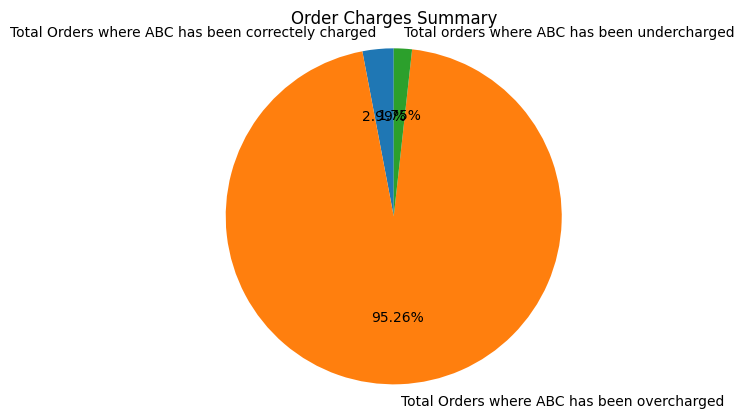

In [44]:
import matplotlib.pyplot as plt

# Extract the counts for the pie chart
labels = df_summary['Description']
sizes = df_summary['Count']

# Calculate the total number of orders to calculate percentages
total_orders = sum(sizes)
percentages = [round((size / total_orders) * 100, 2) for size in sizes]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=lambda p: f'{p:.2f}%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Order Charges Summary')
plt.show()